In [1]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

## My data was collected over diffrent sessions thats why they are in seperate files

In [2]:
# reading all house_data files collected 
data1 = pd.read_csv('C:/Users/EGBUNA/Jiji_web_data/1_bedroom_new.csv')
data2 = pd.read_csv('C:/Users/EGBUNA/Jiji_web_data/one_bedroom_houses.csv')
data3 = pd.read_csv('C:/Users/EGBUNA/Jiji_web_data/2_bedroom.csv')
data4 = pd.read_csv('C:/Users/EGBUNA/Jiji_web_data/2bedroom_new.csv')
data5 = pd.read_csv('C:/Users/EGBUNA/Jiji_web_data/2bedroom_new_2.csv')
data6 = pd.read_csv('C:/Users/EGBUNA/Jiji_web_data/3bedroom.csv')
data7 = pd.read_csv('C:/Users/EGBUNA/Jiji_web_data/owerri_3bedroom.csv')
data8 = pd.read_csv('C:/Users/EGBUNA/Jiji_web_data/1bedroom_abj.csv')
data9 = pd.read_csv('C:/Users/EGBUNA/Jiji_web_data/1bedroom_owerri.csv')
data10 = pd.read_csv('C:/Users/EGBUNA/Jiji_web_data/5bedroom.csv')
data11 = pd.read_csv('C:/Users/EGBUNA/Jiji_web_data/5bedroom_latest.csv')
data12 = pd.read_csv('C:/Users/EGBUNA/Jiji_web_data/4bedrooms.csv')
data13 = pd.read_csv('C:/Users/EGBUNA/Jiji_web_data/new_collections.csv')


In [3]:
# concatinating each file into a single file to then work with

data = pd.concat([data1, data2, data3, data4, data5, data6, data7,data8, data9, data10, data11, data12, data13], axis = 0)
data.reset_index(drop = True)
data.columns = data.columns.str.lower() # changing all the upper case column names to lower case
print(data.shape)


(676, 25)


In [4]:
data.head()

,price,location,house_type,rooms,bathrooms,rent_duration,property address,estate name,property size,condition,...,legal and agreement fee,caution fee,housing quality,total rooms,parking space,smoking,parties,broker fee,new property,furnished
0,"₦ 450,000","Enugu, Enugu / Enugu State",Apartment,1 bedroom,2 bathrooms,per annum,new heaven extension,Good is good,600 sqm,Newly Built,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"₦ 300,000","Anambra, Awka",Apartment,1 bedroom,2 bathrooms,per annum,Ifite Awka,Ifite Awka,500 sqm,Newly Built,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"₦ 200,000","Ogun, Ifo",Studio Apartment,1 bedroom,1 bathroom,per annum,18 adebayo,ifedayo,600 sqm,Fairly Used,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"₦ 1,000,000","Lagos, Ajah",Duplex,1 bedroom,2 bathrooms,per quarter,BROWN NEW ROOM AND PALOUR SELF IN LEKKI SCHEME...,"LEKKI SCHEME 2,ABRAHAM ADESANYA AJAH",450 sqm,Newly Built,...,100000.0,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"₦ 300,000",none,Apartment,1 bedroom,2 bathrooms,per quarter,Marian,smart property,15 sqm,Fairly Used,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.rooms.loc[data.location.str.contains('Lagos')].value_counts()

4 bedrooms    53
5 bedrooms    50
3 bedrooms    45
2 bedrooms    36
1 bedroom     28
Name: rooms, dtype: int64

In [5]:
## we need to clean the values of unwanted symbols and words

'''
columns that needs cleaning :
PRICE column
ROOMS column
BATHROOMS colunms
PROPERTY SIZE (MAYBE A USEFUL COLUMN, IF NOT THEN WE DROP IT)
I be dropping the propety size since its not present in all houses
MERGE ANUALLY and PER ANNUM VALUES IN RENT DURATION COLUMN
MERGE FURNISHING AND FURNISHED INTO ONE COMMON COLUMN AND THEN DROP FURNISHING COLUMN
MERGE CONDITION AND NEW PROPERTY COLUMNS INTO ONE COMMON COLUMNS AND THEN DROP NEW PROPERTY COLUMN
COLLECT DESIRED FEATURES FROM THE FACILITIES COLUMN BEFORE DROPPING IT

'''

'\ncolumns that needs cleaning :\nPRICE column\nROOMS column\nBATHROOMS colunms\nPROPERTY SIZE (MAYBE A USEFUL COLUMN, IF NOT THEN WE DROP IT)\nI be dropping the propety size since its not present in all houses\nMERGE ANUALLY and PER ANNUM VALUES IN RENT DURATION COLUMN\nMERGE FURNISHING AND FURNISHED INTO ONE COMMON COLUMN AND THEN DROP FURNISHING COLUMN\nMERGE CONDITION AND NEW PROPERTY COLUMNS INTO ONE COMMON COLUMNS AND THEN DROP NEW PROPERTY COLUMN\nCOLLECT DESIRED FEATURES FROM THE FACILITIES COLUMN BEFORE DROPPING IT\n\n'

In [6]:
# creating a functionto remove the unwanted letter/symbol from each price value
def remove(data):
    for i in range(len(data)):
        temp =''
        for j in data.iloc[i]:
            if j in [' ', ',', '₦']:
                continue
            else:
                temp = temp + str(j)
        data.iloc[i] = temp
    return pd.to_numeric(data)
    

In [7]:
data.price = remove(data.price)

In [8]:
data['full_address'] = data.location + ' ' + data['property address']
data.full_address.fillna('none',inplace =True)
for i in range(len(data.full_address)):
    if data.full_address.iloc[i] == 'none':
        data.full_address.iloc[i] =data.location.iloc[i]

data.full_address = data.full_address.str.lower()
data.full_address.isnull().sum()

0

In [9]:
data['full_address'].unique()

array(['enugu, enugu / enugu state new heaven extension',
       'anambra, awka ifite awka', 'ogun, ifo 18 adebayo',
       'lagos, ajah brown new room and palour self in lekki scheme 2,ajah',
       'none marian', 'none arthur eze avenue awka.',
       'ogun, obafemi-owode abule oko magboro, ogun state',
       'none alakahia, obio / akpor lga. rivers state', 'none ifite awka',
       'none nza street , gra enugu', 'lagos, isolo, ago palace avenue',
       'kaduna, kaduna / kaduna state phase 1, barnawa',
       "rivers, obio-akpor centenary estate's eneka",
       'lagos, ajah unity estate along badore road,ajah',
       'osun, osogbo a room and self contain at fountain area oshogbo',
       'oyo, ido located immediatly after awotan junction', 'none atimbo',
       'none satellite town', 'enugu, enugu / enugu state ogui road',
       'none atimbo off nyangasang',
       'lagos, lekki, lekki phase 1 akin onitiri cole street,',
       'anambra, awka ichida street', 'lagos, lekki chevro

In [10]:
'''
want to divide the houses into urban, semi urban and rural areas
to do that i'll have to fetch list of urban areas in each of these states and put them in a list
''' 
semi_urban = '''port harcourt, owerri, enugu, ajah, surulere, ogudu, magodo, ikeja, isolo, ago palace, calabar, lugbe, jahi, yenegoa, apapa, jabi, lokogoma, kuje, karu, mabushi, durumi, gudu, guzape, galadimawa, gwarinpa'''.split(', ')


urban = '''lekki, victoria island, ikoyi, banana island, asokoko, maitama, wuse, garki, utako'''.split(', ')


data['area'] = data.full_address.copy()
for i in range(len(data.full_address)):
    for place in urban:
        if re.search(place, data.full_address.iloc[i]):
            data.area.iloc[i] = 'urban'
            break

            
    for place in semi_urban:
        if re.search(place, data.full_address.iloc[i]):
            data.area.iloc[i] = 'semi_urban'
            break
data.area = data.area.apply(lambda x: 'rural' if x not in ['semi_urban', 'urban'] else  x)

In [11]:
data.area.value_counts()

rural         294
semi_urban    243
urban         139
Name: area, dtype: int64

<AxesSubplot:xlabel='rooms,area'>

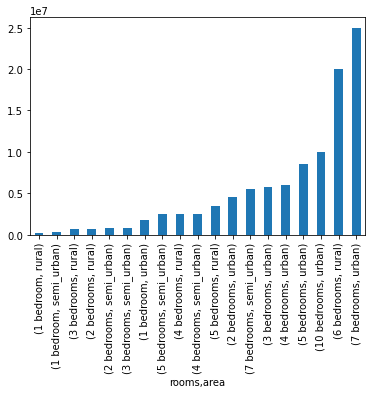

In [12]:
data.groupby(['rooms','area'])['price'].median().sort_values().plot(kind = 'bar')

In [13]:
data.drop(['full_address'], axis = 1, inplace = True)

In [14]:
data.describe()

,price,agency fee,legal and agreement fee,caution fee
count,6.760000e+02,159.000000,1.460000e+02,107.000000
mean,3.514248e+06,131773.553459,1.190653e+05,92402.663551
std,5.611369e+06,189223.891248,1.905449e+05,125806.169318
min,1.000000e+04,5.000000,5.000000e+00,0.000000
25%,6.000000e+05,50.000000,5.000000e+01,2650.000000
50%,1.500000e+06,50000.000000,5.000000e+04,50000.000000
75%,3.850000e+06,200000.000000,1.500000e+05,100000.000000
max,6.000000e+07,1000000.000000,1.250000e+06,1000000.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 0 to 77
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    676 non-null    int64  
 1   location                 676 non-null    object 
 2   house_type               676 non-null    object 
 3   rooms                    676 non-null    object 
 4   bathrooms                676 non-null    object 
 5   rent_duration            676 non-null    object 
 6   property address         615 non-null    object 
 7   estate name              362 non-null    object 
 8   property size            297 non-null    object 
 9   condition                588 non-null    object 
 10  furnishing               654 non-null    object 
 11  pets                     360 non-null    object 
 12  facilities               468 non-null    object 
 13  service charge           134 non-null    object 
 14  agency fee               15

In [16]:
## from the rooms column, we are to remove the string values present
data.rooms = data.rooms.apply(lambda x: x[0])
data.rooms = pd.to_numeric(data.rooms)
data.rooms.value_counts()

4    167
3    135
5    129
2    122
1    120
7      2
6      1
Name: rooms, dtype: int64

In [17]:
## we do the same thing for the bathrooms columns
data.bathrooms = data.bathrooms.apply(lambda x: x[0])
data.bathrooms = pd.to_numeric(data.bathrooms)
data.bathrooms.value_counts()

5    221
3    146
4    139
1     85
2     85
Name: bathrooms, dtype: int64

In [18]:
data['property size'].isnull().sum()

379

In [19]:
data.location.unique()

array(['Enugu, Enugu / Enugu State', 'Anambra, Awka', 'Ogun, Ifo',
       'Lagos, Ajah', 'none', 'Ogun, Obafemi-Owode',
       'Lagos, Isolo, Ago Palace', 'Kaduna, Kaduna / Kaduna State',
       'Rivers, Obio-Akpor', 'Osun, Osogbo', 'Oyo, Ido',
       'Lagos, Lekki, Lekki Phase 1', 'Lagos, Lekki',
       'Nasarawa, Karu-Nasarawa', 'Lagos, Ikoyi', 'Lagos, Yaba',
       'Oyo, Oluyole', 'Lagos, Ibeju, Bogije',
       'Lagos, Ikoyi, Osborne Foreshore Estate', 'Lagos, Lekki, Ikota',
       'Lagos, Ajah, Sangotedo', 'Lagos, Yaba, Akoka', 'Kaduna, Chikun',
       'Abuja, Lugbe District', 'Lagos, Ajah, Ado / Ajah',
       'Cross River, Calabar', 'Lagos, Ajah, Off Lekki-Epe Expressway',
       'Lagos, Lekki, Osapa london', 'Lagos, Ilashe',
       'Lagos, Gbagada, Phase 1 / Gbagada', 'Lagos, Ibeju, Ibeju-Agbe',
       'Lagos, Ibeju', 'Lagos, Ibeju, Awoyaya', 'Lagos, Amuwo-Odofin',
       'Lagos, Ikotun/Igando, Igando / Ikotun/Igando',
       'Lagos, Victoria Island', 'Imo, Owerri',
       'Lagos

## we have to merge ANNUALLY and  PER ANNUM into one value

In [20]:
data.rent_duration.unique()

data.rent_duration.iloc[data.rent_duration == 'anually'] = 'per annum'
data.rent_duration.value_counts()

per annum      589
per quarter     84
per month        3
Name: rent_duration, dtype: int64

## we have to merge NEW PROPERTY AND CONDITION column together

In [21]:

data.condition.value_counts()

Newly Built    383
Fairly Used    170
Renovated       32
Old              3
Name: condition, dtype: int64

In [22]:
data.condition.fillna('Fairly Used', inplace = True)
data.condition.value_counts()

Newly Built    383
Fairly Used    258
Renovated       32
Old              3
Name: condition, dtype: int64

In [23]:
data.reset_index(inplace = True) # we first reset the index of the dataframe to avoid error
index = data['new property'].loc[data['new property'] == 'Yes'].index
for i in index:
    data.condition.iloc[i] = 'Newly Built'

no_index = data['new property'].loc[data['new property'] == 'No'].index    
for i in no_index:
    data.condition.iloc[i] = 'Fairly Used'
data.condition.value_counts()

Newly Built    423
Fairly Used    218
Renovated       32
Old              3
Name: condition, dtype: int64

## also merging the FURNISHED AND FURNISHING column

In [24]:
# no need to reset index since we've already done that above
index = data.furnished.loc[data.furnished == 'Yes'].index
for i in index:
    data.furnishing.iloc[i] = 'Furnished'
print(data.furnishing.value_counts())

Semi-Furnished    248
Unfurnished       226
Furnished         202
Name: furnishing, dtype: int64


## extracting house facilities from the FACILITIES colum

In [25]:
data.facilities.unique()

array(['Balcony,Chandelier,24 Hours Electricity,Dishwasher,Pop Ceiling,Tiled Floor,Wardrobe,Dining Area,Pre Paid Meter,Hot Water,Kitchen Cabinets',
       '24 Hours Electricity,Dining Area,Balcony,Kitchen Cabinets',
       'Pre Paid Meter,Tiled Floor,Dishwasher,Kitchen Shelf,24 Hours Electricity',
       'Balcony,Chandelier,Dining Area,Wardrobe,Wi-Fi,Pop Ceiling,Hot Water,Kitchen Shelf,Pre Paid Meter,Dishwasher,24 Hours Electricity,Kitchen Cabinets,Tiled Floor',
       'Balcony,24 Hours Electricity,Kitchen Shelf,Dining Area,Kitchen Cabinets',
       nan,
       'Apartment,Dishwasher,Tiled Floor,Wardrobe,Kitchen Cabinets,Balcony',
       'Tiled Floor,Kitchen Cabinets,Balcony,24 Hours Electricity,Pre Paid Meter,Wardrobe',
       'Tiled Floor,Dishwasher,Kitchen Shelf,Pre Paid Meter',
       'Chandelier,Pop Ceiling,24 Hours Electricity,Tiled Floor,Air Conditioning,Dishwasher,Dining Area,Balcony,Kitchen Cabinets,Pre Paid Meter,Wardrobe,Kitchen Shelf,Hot Water',
       'Dishwasher,Pop Ceilin

In [26]:
copy = data.copy()

In [27]:
data.facilities.fillna('none', inplace = True)
data.facilities = data.facilities.apply(lambda x : x.lower())

In [28]:
data['dishwasher'] = data.facilities.copy()

data['dishwasher'].loc[data.facilities.str.contains('dishwasher')] = 'yes'
data['dishwasher'].loc[data['dishwasher'] != 'yes'] = 'no'

data.dishwasher.value_counts()

no     481
yes    195
Name: dishwasher, dtype: int64

In [29]:
data['prepaid_meter'] = data.facilities.copy()

data['prepaid_meter'].loc[data.facilities.str.contains('pre paid meter')] = 'yes'
data['prepaid_meter'].loc[data['prepaid_meter'] != 'yes'] = 'no'

data.prepaid_meter.value_counts()

no     346
yes    330
Name: prepaid_meter, dtype: int64

In [30]:
data['dinning_area'] = data.facilities.copy()

data['dinning_area'].loc[data.facilities.str.contains('dining area')] = 'yes'
data['dinning_area'].loc[data['dinning_area'] != 'yes'] = 'no'

data.dinning_area.value_counts()

yes    351
no     325
Name: dinning_area, dtype: int64

In [31]:
data['air_conditioning'] = data.facilities.copy()

data['air_conditioning'].loc[data.facilities.str.contains('air conditioning')] = 'yes'
data['air_conditioning'].loc[data['air_conditioning'] != 'yes'] = 'no'

data.air_conditioning.value_counts()

no     572
yes    104
Name: air_conditioning, dtype: int64

In [32]:
data['chandelier'] = data.facilities.copy()

data['chandelier'].loc[data.facilities.str.contains('chandelier')] = 'yes'
data['chandelier'].loc[data['chandelier'] != 'yes'] = 'no'

data.chandelier.value_counts()

no     465
yes    211
Name: chandelier, dtype: int64

## extracting the state from location column

In [33]:
data['state'] = data.location.apply(lambda x: x.split(',')[0])
data.state = data.state.str.lower()
data.state.value_counts()

lagos          212
rivers         108
none           104
abuja           70
imo             68
enugu           55
anambra         15
cross river     10
oyo             10
kaduna           9
ogun             7
nasarawa         5
bayelsa          1
osun             1
borno            1
Name: state, dtype: int64

In [34]:
data['property address'] = data['property address'].str.lower()
data['property address'].unique()

array(['new heaven extension', 'ifite awka', '18 adebayo',
       'brown new room and palour self in lekki scheme 2,ajah', 'marian',
       'arthur eze avenue awka.', 'abule oko magboro, ogun state',
       'alakahia, obio / akpor lga. rivers state',
       'nza street , gra enugu', 'avenue', 'phase 1, barnawa',
       "centenary estate's eneka", 'unity estate along badore road,ajah',
       'a room and self contain at fountain area oshogbo',
       'located immediatly after awotan junction', 'atimbo',
       'satellite town', 'ogui road', 'atimbo off nyangasang',
       'akin onitiri cole street,', 'ichida street', 'chevron',
       'kosta hostel, close to nnamdi azikiwe university awka',
       'ifite awka anambra state', 'off independence layout',
       'book foundation ifite awka anambra state', 'aso maraba',
       'behind northern noodles company', 'old ikoyi', 'mahuta extension',
       'via herbert macaulay', 'jankata kuola', 'elewuro',
       'araromi akesan igando', 'bogije 

In [35]:
index = data.location.loc[data.location =='none'].index

In [36]:
for i in index:
    data.location.iloc[i] = data['property address'][i]

In [37]:
data.location[index]

4                                        marian
5                       arthur eze avenue awka.
7      alakahia, obio / akpor lga. rivers state
8                                    ifite awka
9                        nza street , gra enugu
                         ...                   
540                     4a, c close, ogun state
543                               akala express
550                 ogunlaja drive , majek area
554        imalete estate opp beach wood estate
572                                         106
Name: location, Length: 104, dtype: object

In [38]:
data['location'].fillna('none', inplace = True) ##to fill the null values present in the location column

In [39]:
data.location = data.location.str.lower()
data.state= data.state.str.lower() # just to make sure they are all in the same letter case
states = data.state.unique()
for i in index:
    for state in states:
        if re.search(state, data.location.iloc[i]):
            data.state.iloc[i] = state
            print(i, state)

7 rivers
9 enugu
25 anambra
27 anambra
65 rivers
90 ogun
139 rivers
274 anambra
528 abuja
534 abuja
540 ogun
550 ogun


In [40]:
data.state.value_counts()

lagos          212
rivers         111
none            92
abuja           72
imo             68
enugu           56
anambra         18
ogun            10
cross river     10
oyo             10
kaduna           9
nasarawa         5
bayelsa          1
osun             1
borno            1
Name: state, dtype: int64

In [41]:
index = data.state.loc[data.state == 'none'].index

In [42]:
## soe property address still has some hidden address we can work with, so i am extracting it by state

lagos = ['ajah', 'lekki','marian', 'satellite town','igando']
abuja = ['kuje', 'lokogoma', 'gudu', 'lugbe']
rivers = ['port harcourt','odili road']
imo = ['ihiagwa']
oyo = ['ibadan']
edo = ['auchi']
anambra = ['awka']


In [43]:
## i'll be looping throug every state to change them all at once
rare_places = [lagos,abuja,rivers,imo,oyo,edo,anambra]
cities = ['lagos','abuja','rivers','imo','oyo','edo','anambra']
count = 0
for rare in rare_places:
    for i in index:
        for place in rare:
            if re.search(place, data.location.iloc[i]):
                data.state.iloc[i] = cities[count]
                break
    count += 1

In [44]:
data.state.value_counts()

lagos          218
rivers         113
abuja           75
imo             69
enugu           56
none            55
anambra         41
oyo             11
ogun            10
cross river     10
kaduna           9
nasarawa         5
edo              1
bayelsa          1
osun             1
borno            1
Name: state, dtype: int64

In [45]:
data.loc[data.state == 'anambra'].groupby('state')['rooms'].value_counts()

state    rooms
anambra  3        18
         2        12
         1        10
         4         1
Name: rooms, dtype: int64

In [46]:
data.loc[data.state == 'abuja'].groupby('state')['rooms'].value_counts()

state  rooms
abuja  4        24
       5        24
       1        12
       3        12
       7         2
       6         1
Name: rooms, dtype: int64

In [47]:
data.loc[data.state == 'rivers'].groupby('state')['rooms'].value_counts()

state   rooms
rivers  4        47
        2        21
        5        19
        1        15
        3        11
Name: rooms, dtype: int64

In [48]:
## we need to create a column for house in an estate
data['estate name'].unique()

array(['Good is good', 'Ifite Awka', 'ifedayo',
       'LEKKI SCHEME 2,ABRAHAM ADESANYA AJAH', 'smart property', nan,
       'Harmony Estate', 'Awka Anambra State', 'Phase 1',
       'Centenary gardens Estate Eneka', 'UNITY ESTATE',
       'FOUNTAIN ROAD OSHOGBO', 'Dtb', 'Lekki phase one', 'Ichida street',
       'Chevyview', 'Kosta Hostel ( Kruz Enterprise)', 'Golden shelters',
       'Godfelic Lodge ( Kruz Enterprise)', '.', 'Tasu villa',
       'oil village', 'Jankata Sreet', 'Akobo',
       'Osborne Foreshore Estate', 'ikota villa',
       'Silver Land Estate Sangotedo Ajah',
       'Silver land Estate Sangotedo', 'Jankata road', 'New estate',
       'ajegunle', 'Beside Lapai estate', 'His Grace Hostel', 'Barnawa',
       'PUMP AND SELL', 'ROCK STONE ESTATE', 'Destiny Homes',
       'tera annex Estate', 'jankata street', 'osapa london',
       'GRA , Awka', 'Valley view Estate', 'Rukpokwu Estate',
       'Gra phase 8', 'Ayeibami ibeju lekki', 'oluwa off GRA abijo',
       'Awoyaya 

In [49]:
## due to some misleading names in the estate name column, i'll just pick those names that contain 'ESTATE' keyword
data['estate name'].fillna('unknown', inplace = True)
data['estate name'] = data['estate name'].str.lower()
data['estate'] = data['estate name'].copy()
data['estate'].loc[data['estate name'].str.contains('estate')] = 'yes'
data['estate'].loc[data['estate'] != 'yes'] = 'no'
data.estate.value_counts()

no     545
yes    131
Name: estate, dtype: int64

<AxesSubplot:xlabel='estate'>

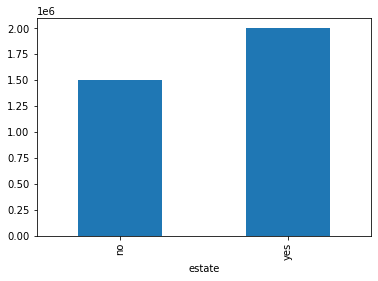

In [50]:
data.groupby('estate')['price'].median().plot(kind = 'bar')

In [51]:
## bringing out columns that contain null values
data.isnull().sum().sort_values(ascending = False)

furnished                  654
housing quality            638
parties                    633
smoking                    633
new property               627
broker fee                 624
parking space              585
total rooms                582
caution fee                569
service charge             542
legal and agreement fee    530
agency fee                 517
property size              379
pets                       316
property address            61
area                         0
chandelier                   0
dinning_area                 0
dishwasher                   0
state                        0
prepaid_meter                0
air_conditioning             0
index                        0
price                        0
facilities                   0
furnishing                   0
condition                    0
estate name                  0
rent_duration                0
bathrooms                    0
rooms                        0
house_type                   0
location

In [52]:
## counting how many columns that dosen't have null values
count = 0
for i in data.columns:
    if data[i].isnull().any() == False:
        count += 1
    else:
        pass
print(count)

19


In [53]:
## dropping all the columns i wont be making use of again
for column in data.columns:
    if data[column].isnull().any():
        data.drop([column], axis =1, inplace = True)

data.drop(['index'],axis = 1, inplace =True)
print(data.columns)

Index(['price', 'location', 'house_type', 'rooms', 'bathrooms',
       'rent_duration', 'estate name', 'condition', 'furnishing', 'facilities',
       'area', 'dishwasher', 'prepaid_meter', 'dinning_area',
       'air_conditioning', 'chandelier', 'state', 'estate'],
      dtype='object')


In [54]:
data.to_csv('C:/Users/EGBUNA/Jiji_web_data/jiji_house_data(cleaned).csv',index = False) # saving the data to file

In [55]:
data.columns

Index(['price', 'location', 'house_type', 'rooms', 'bathrooms',
       'rent_duration', 'estate name', 'condition', 'furnishing', 'facilities',
       'area', 'dishwasher', 'prepaid_meter', 'dinning_area',
       'air_conditioning', 'chandelier', 'state', 'estate'],
      dtype='object')

In [56]:
#data = pd.read_csv('C:/Users/EGBUNA/Jiji_web_data/jiji_house_data.csv') # reading the data into a variable

In [57]:

'''
train = pd.concat([data1, data2, data3, data4, data5, data6, data7,data8, data9, data10, data11, data12, data13], axis = 0)
train.reset_index(drop = True)
train.columns = train.columns.str.lower() # changing all the upper case column names to lower case
train.to_csv('C:/Users/EGBUNA/Jiji_web_data/full_house_data_jiji.csv', index = False)
'''

"\ntrain = pd.concat([data1, data2, data3, data4, data5, data6, data7,data8, data9, data10, data11, data12, data13], axis = 0)\ntrain.reset_index(drop = True)\ntrain.columns = train.columns.str.lower() # changing all the upper case column names to lower case\ntrain.to_csv('C:/Users/EGBUNA/Jiji_web_data/full_house_data_jiji.csv', index = False)\n"